In [ ]:
%%html
<center><marquee style='width: 60%; color: blue;'><b>✌ ¡Hola a todos! Hoy es una clase importante ✌ </b></marquee><center>

<table>
    <tr>
        <td><img src="https://raw.githubusercontent.com/Fabian830348/Bases_Datos/refs/heads/master/Logo_EICT_horizontal_ESPANOL%20(1).png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">    <FONT COLOR="blue"> Conceptos Machine Learning </p> Clasificación </p> KNN (vecinos más cercanos)   </FONT>         </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Machine Learning </p></tp>
            <tp><p style="font-size:115%;text-align:center">A. Supervisado</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Fabián Sánchez</p></tp>
        </td>
    </tr>
</table>




# <FONT SIZE=4 COLOR="purple"> 1. Objetivos de la sesión: </FONT>

✔  En esta sesión revisaremos algunos conceptos fundamentales de Machine Learning como por ejemplo, conjunto de entrenamiento, conjunto de prueba, métrica de evaluación, validación cruzada (cross-validation),  hiperparámetros, entre otros.

✔ Por otro lado, estudiaremos en qué consisten los problemas de clasificación y estudiaremos el primer modelo clásico de este tipo: los *k-vecinos más cercanos*. Además, revisaremos la matriz de confusión y las diferentes métricas como el *recall* , *accuracy*, *precision*, etc.


# <FONT SIZE=4 COLOR="purple"> 2. Conceptos básicos de Machine Learning </FONT>

En está sección revisaremos algunos conceptos básicos de machine learning en los cuales se profundizará en lo que sigue del notebook.

<FONT SIZE=3 COLOR="green"> a. Algoritmos de clasificación: </FONT>  técnicas de aprendizaje supervisado, en el cual el resultado que queremos predecir, es decir, las "etiquetas" (variable $\mathbf{y}$), es discreto.

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/supervisado5.png?raw=true" alt="centered image" width="700" height="200"></center>
<br>

<FONT SIZE=3 COLOR="green"> b. Variable Objetivo: </FONT> también denominada **variable de respuesta**. En un algoritmo de aprendizaje de máquina supervisado, es la variable que queremos predecir (por lo general, denotada como $\mathbf{y}$). Esta puede ser discreta o continua. En el primer caso, da lugar a algoritmos de ***clasificación*** y en el segundo caso a algoritmos de ***regresión***.

<br>

<FONT SIZE=3 COLOR="green"> c. Variable Predictora: </FONT> también denominada ***features*** o características, son las variables que se usarán para predecir la variable objetivo. Estas se denotan como

$$\mathbf{X}=\{X_1,X_2, \dots, X_n \}$$

<br>

<FONT SIZE=3 COLOR="green"> d. Conjunto de Entrenamiento: </FONT> es el subconjunto de registros que se selecciona para entrenar el modelo. Este conjunto consta de dos partes:

- $X_{train}$ : conjunto de entrenamiento de los predictores o *features*.

- $y_{train}$: conjunto de entrenamiento de la variable objetivo asociada al conjunto $X_{train}$.

El conjunto de entrenamiento se selecciona de manera aleatoria y por lo general se toma el $70\%$ , $75\%$ y $80 \%$.

<br>

<FONT SIZE=3 COLOR="green"> e. Conjunto de Prueba o Validación: </FONT>: Es el subconjunto de registros que se selecciona para validar el modelo. Consta de dos partes:

- $X_{test}$ : conjunto de validación de los predictores o *features*.

- $y_{test}$: conjunto de validación de la variable objetivo asociada al conjunto $X_{test}$.

El tamaño de este conjunto es el complemento del conjunto de entrenamiento.

<br>

<FONT SIZE=3 COLOR="green"> f. Matriz de Confusión:</FONT> Herramienta usada para evaluar el rendimiento del modelo. (se ampliará más adelante las métricas y conceptos).

<br>

<FONT SIZE=3 COLOR="green"> g. Hiperparámetro: </FONT> son variables de configuración externa al modelo original (general) que se pueden ajustar para entrenar el modelo. (cada modelo tiene diferentes hiperparámetros)


<center><FONT SIZE=4 COLOR="BLUE"> ESQUEMA GENERAL DE CLASIFICACIÓN EN MACHINE LEARNING </FONT></center>
<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/Intro-knn/ESQUEMA%20DE%20CLASIFICACI%C3%93N.png?raw=true" alt="centered image" width="700" height="400"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>
<br>


A continuación, revisaremos en detalle uno de los primeros algoritmos de machine learning y con este ilustraremos algunos conceptos y herramientas que aplican también para otros algoritmos de clasificación.

# <FONT SIZE=4 COLOR="Purple"> 3. Algoritmo de clasificación KNN : K-vecinos más cercanos </FONT>

En esta sección revisaremos el algoritmo de clasificación ***KNN: k-nearest neighbors*** : K-vecinos más cercanos.

## <FONT SIZE=4 COLOR="blue"> 3.1 ¿En qué consiste? </FONT>

Este algoritmo consiste en clasificar los valores de una variable categórica de acuerdo con los vecinos más cercanos. A continuación explicaremos el funcionamiento

1. Supongamos que queremos clasificar el cuadrado amarillo en las dos posibles clases.

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/Intro-knn/knn1.png?raw=true?" alt="centered image" width="600" height="450"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Libro Guía  </FONT> <figcaption></center>




2. Por ejemplo, si tenemos otro valor de $k$ la clasificación puede cambiar.

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/Intro-knn/knn2.png?raw=true?" alt="centered image" width="600" height="450"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Libro Guía  </FONT> <figcaption></center>



## <FONT SIZE=4 COLOR="blue"> 3.2 Descripción del algoritmo: pseudocódigo </FONT>

- Determinar el valor de $k$.

- Calcular la distancia del punto a clasificar a todos los otros puntos.

- Ordenar de manera ascendente las distancias.

- Tomar los puntos más cercanos al punto a clasificar de acuerdo con el valor que le asignemos a $k$.

- Contar cuántos puntos de cada clase están en la vecindad y definimos por mayoría.

- Por ejemplo: Si k es 3 y tenemos

   + Distancia 1 : 2.5 : clase a

   + Distancia 2 : 2.51 : clase b

   + Distancia 3 : 2.53 : clase a

  Conclusión: El punto se clasifica en la clase a.

En caso de que haya empate se pueden definir algunos criterios de desempate. Por ejemplo:

  - la clase que contenga al vecino más cercano.
  - la clase con la distancia media más pequeña.

## <FONT SIZE=4 COLOR="blue"> 3.3 Sobre el algoritmo </FONT>

A continuación, algunos puntos importantes que se deben tener en cuenta sobre el algoritmo ***knn***

1. Observe que no se genera un modelo que sea consecuencia de un entrenamiento previo, sino que el aprendizaje se da en el mismo momento en el que se prueban los datos de validación. A este tipo de algoritmos se les denomina ***lazy learning methods***.

2. Como utiliza todo el set de entrenamiento para calcular las distancias, se tiene un costo computacional alto.

3. Es un algoritmo que da buenos resultados, pero es recomendable para conjuntos de datos no tan grandes.

4. Es muy sensible al valor de $k$ y a la distancia seleccionada.

5. Es importante escalar los datos.

## <FONT SIZE=4 COLOR="blue"> 3.4 Sobre las distancias </FONT>

El algoritmo $knn$ está fundamentado en la distancia entre dos puntos. Si bien, una de las distancias más conocida es la distancia euclideana, existen otras distancias que se pueden usar para el algoritmo.

## <FONT SIZE=3 COLOR="magenta"> Distancia Euclideana </FONT>

$$ \left (\sum \limits_{i=1}^n (x_i-y_i)^2 \right)^{1/2}$$

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/Intro-knn/dis_euclide.png?raw=true" alt="centered image" width="600" height="300"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>
<br>

Esta métrica se puede usar para variables con valores discretos o continuos en general.

## <FONT SIZE=3 COLOR="magenta"> Distancia de Manhattan</FONT>

$$ \sum \limits_{i=1}^{n} |x_i-y_i|$$

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/Intro-knn/dis_manhattan.png?raw=true" alt="centered image" width="600" height="300"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>
<br>

Observe que es más sencilla que la euclideana (tiene menos cálculos)

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/Intro-knn/knn3.png?raw=true?" alt="centered image" width="600" height="450"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>

La métrica euclideana y de Manhattan tienen una generalización que se denomina.

## <FONT SIZE=3 COLOR="magenta"> Distancia de Minkowski</FONT>

$$ \left (\sum \limits_{i=1}^n |x_i-y_i|^p \right)^{1/p}$$

## <FONT SIZE=3 COLOR="magenta"> Distancia de Hamming</FONT>

$$Distancia \,\, Hamming : \begin{cases} 0 & \text{si $x=y$} \\ 1 & \text{si $x \neq y$}   \end{cases}$$

Esta distancia es equivalente a la de Manhattan para variables binarias, es decir, que solo tienen ceros y unos

$$ a = \begin{pmatrix} 1 \\ 0 \\ 1 \\ 1 \end{pmatrix}  \qquad b = \begin{pmatrix} 0 \\ 1 \\ 1 \\ 1 \end{pmatrix}$$

## <FONT SIZE=3 COLOR="magenta"> Distancia Euclideana con pesos </FONT>

$$ \left (\sum \limits_{i=1}^n w_i(x_i-y_i)^2 \right)^{1/2}$$

donde los pesos resultan, por ejemplo, del escalamiento de los datos.



## <FONT SIZE=4 COLOR="blue"> 3.5 Sobre los valores de $k$ </FONT>

Un parámetro muy importante en el algoritmo de *knn* es el valor de $k$.  Inicialmente, no hay una forma general de escogerlo, sin embargo

- Si se toma un valor de $k$ muy pequeño se puede sobreajustar (overfitting).

- Si el valor de $k$ es muy grande sucede lo contrario. Será más dificil clasificar.

- Un valor inicial que se puede tomar es $k=\sqrt{n}$, donde $n$ es el número de datos y a partir de este se ajusta el modelo.

- Se recomienda **Tunear** (optimizar) el hiperparámetro $k$. Se dice hiperparámetro ya que es un parámetro que se utiliza para entrenar el modelo.

## <FONT SIZE=4 COLOR="blue"> 3.6 Sobre el escalamiento </FONT>

El algoritmo *knn* está fundamentado en seleccionar mínimas distancias, en ese orden de ideas, observe lo siguiente.

- Si se tiene una variable $X_1$ que varía en $[1,2]$ y otra variable $X_2$ que varía en $[1000, 2000]$. Al calcular distancias con los valores de estas variables $X_2$ dominará a $X_1$ que tiene valores más pequeños y como el algoritmo utiliza la distancia para clasificar entonces queda sesgado el resultado.

Por lo anterior, se deben escalar las variables predictoras y en general se usan las siguientes dos funciones.

## <FONT SIZE=3 COLOR="blue"> StandardScaler </FONT>

$$\dfrac{X-\mu}{\sigma}$$


## <FONT SIZE=3 COLOR="blue"> MaxminScaler </FONT>

$$\dfrac{X-X_{min}}{X_{max}-X_{min}}$$





A continuación, revisaremos un ejemplo donde ilustraremos los conceptos, el código de programación y otros elementos importantes.

# <FONT SIZE=5 COLOR="purple"> 4. Ejemplo Práctico </FONT>

- En esta sección haremos un ejemplo práctico.

- Iniciaremos indicando las librerías que debemos usar.

## <FONT SIZE=4 COLOR="blue"> 4.1 Librerías de trabajo </FONT>

In [1]:
# Manipulación de data.frames
import pandas       as pd
import numpy        as np

# Librerías para Gráficos
import matplotlib.pyplot  as plt
import seaborn            as sns
import plotly.express     as px

# Librerías para datos de entrenamiento y prueba
from sklearn.model_selection    import train_test_split

# Para preprocesamiento/escalar los datos
from sklearn.preprocessing      import StandardScaler, MinMaxScaler

# Para aplicar k-nearest neighbors
from sklearn.neighbors          import KNeighborsClassifier

# Métricas de evaluación
from sklearn                    import metrics
from sklearn.metrics            import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics            import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score

# Optimización de hiperparámetros
from sklearn.model_selection    import GridSearchCV, RandomizedSearchCV

# Para ignorar los warnings
import warnings
warnings.filterwarnings("ignore")

## <FONT SIZE=4 COLOR="blue"> 4.2 Contexto del problema </FONT>

 En este caso intentaremos predecir a qué categoría corresponde un conjunto de datos.

En términos generales, seremos mucho más precisos si tenemos que modelar el comportamiento de una categoría que de una variable continua, por lo que veremos que muchas veces, incluso los problemas de predecir variables numéricas se pueden discretizar y convertir en problemas de clasificación.

En este caso, veremos un caso típico de problema de clasificación. Queremos predecir si una integrante de una muestra que representa a una población, tiene diabetes. Queremos hacer esto a partir de múltiples variables que tenemos de cada una de las pacientes:

- ***Pregnancies***: Número de embarazos que ha tenido en su vida
- ***Glucose***: Nivel de concentración de glucosa en sangre
- ***BloodPressure***: Presión arterial
- ***SkinThikness***: Espesor de piel a la altura del triceps
- ***Insulin***: Respuesta a dosis de insulina en 2 horas
- ***BMI***: Índice de masa corporal
- ***DiabetesPedigreeFunction***: Presencia de diabetes en ascendencia directa
- ***Age***: Edad del paciente
- ***Outcome***: Variable que queremos predecir:
   - $1$ : Tiene diabetes
   - $0$ : No tiene diabetes



## <FONT SIZE=4 COLOR="blue"> 4.3 Importar los datos </FONT>

Vamos a traer los datos del GitHub de la siguiente manera.

Lo primero que haremos es importar los datos que están en el siguiente link o pueden ser descargados de la página de Kaggle.

In [2]:
url = "https://raw.githubusercontent.com/Fabian830348/Bases_Datos/master/diabetes.csv"

In [3]:
diabetes= pd.read_csv(url)

In [4]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## <FONT SIZE=4 COLOR="blue"> 4.4 Exploración rápida de los datos </FONT>

Antes de hacer cualquier modelo de machine learning o análisis similar es fundamental entender y explorar las variables del conjunto de datos.

In [11]:
# cabeza de los datos (primeros)
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
# cola de los datos (último registros)
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [15]:
# revisar las columnas de los datos
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [17]:
# tamaño de los datos
diabetes.shape

(768, 9)

In [18]:
# revisar la información de los datos
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
# estadísticos descriptivos
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Ahora, vamos a hacer dos pasos adicionales de alistamiento del conjunto de datos:

1. vamos a cambiar el nombre de la variable Outcome por Resultado

2. Vamos a explorar la variable objetivo

In [20]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
# cambiar el nombre de la variable objetivo
# inplace : sobreescribir o no
diabetes.rename(columns = {"Outcome" : "resultado"}, inplace = True )

In [24]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,resultado
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
# contar las categorias de la variable resultado
diabetes.resultado.value_counts()

,count
resultado,
0,500
1,268


Hacemos la gráfica de barras de las frecuencias

In [28]:
# boxplot de la variable edad
px.box(diabetes.Age)

In [27]:
# gráfica con plotly express
px.bar(diabetes.resultado.value_counts(),
       color = ["no", "si"])

In [29]:
px.pie(diabetes,
       names = "resultado" )

**Cuidado 🍳**: En esta parte hay que tener especial atención,  particularmente en otros algoritmos. Cuando los datos están desbalanceados pueden afectar los resultados. Para esto se puede usar algunas técnicas de balanceo de datos: *subsampling*, *oversampling* y *smote*.

- Para continuar con el ejercicio, trabajaremos con las clases como están.

## <FONT SIZE=4 COLOR="blue"> 4.5 Conjunto de Entrenamiento y Prueba </FONT>

- **data training:** Datos que usamos para entrenar el modelo.

- **testing data:** Datos que reservamos para comprobar si el modelo generado a partir de los datos de entrenamiento, funciona

Normalmente, usamos $70\%-30\%$ / $80\%-20\%$

In [30]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,resultado
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Primero le daremos nombre a la variable objetivo (y) y a las variables predictoras (X)

In [32]:
# las variables predictoras
X = diabetes.drop("resultado", axis=1)
# la variable objetivo
y = diabetes["resultado"]

In [37]:
# Dividir en dos conjuntos: entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,                        # variables predictoras
                                                    y,                        # variable de respuesta
                                                    random_state = 0,         # semilla para que al ejecutar siempre de igual
                                                    test_size = 0.3)          # tamaño del conjunto de prueba

In [35]:
diabetes.shape

(768, 9)

Veamos los tamaños de estos conjuntos

In [38]:
print("El tamaño de X_train es {}".format(X_train.shape))
print("El tamaño de y_train es: {}".format(y_train.shape))
print("El tamaño de X_test es {}".format(X_test.shape))
print("El tamaño de y_test es: {}".format(y_test.shape))

El tamaño de X_train es (537, 8)
El tamaño de y_train es: (537,)
El tamaño de X_test es (231, 8)
El tamaño de y_test es: (231,)


Exploremos alguno de ellos.

In [39]:
# los primeros datos del conjunto de entrenamiento
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
580,0,151,90,46,0,42.1,0.371,21
418,1,83,68,0,0,18.2,0.624,27
764,2,122,70,27,0,36.8,0.340,27
363,4,146,78,0,0,38.5,0.520,67
757,0,123,72,0,0,36.3,0.258,52


In [40]:
# los primeros datos del conjunto de prueba
y_train.head()

,resultado
580,1
418,0
764,0
363,1
757,1


## <FONT SIZE=4 COLOR="blue"> 4.6 Escalar las variables predictoras </FONT>

- En los algoritmos donde se vea involucrada una distancia es importante hacer el escalamiento.

- Una recomendación es hacer el escalamiento después de dividir en entrenamiento y prueba, ya que la idea es que no se sobreentrene el modelo.


In [41]:
# definimos la función para escalar
escalar = StandardScaler()
# lo aplicamos a los conjuntos
X_train_s = escalar.fit_transform(X_train)
X_test_s = escalar.transform(X_test)

In [ ]:
X_train_s

**Observación importante de lo anterior**.

a. Para $X_{train}$ usamos ***fit.transform*** esto significa que los datos de este conjunto se escalarán con base a su $\mu$ media y $\sigma$ desviación estándar. (que no son lo mismo que calcularla sobre todo el conjunto)

b. Para $X_{test}$ usamos ***.transform*** esto significa que para escalar los datos del conjunto de prueba se usan los parámetros $\mu$ y $\sigma$ obtenidos en la parte a. con el conjunto de entrenamiento $X_{train.}$

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/Intro-knn/knn4.png?raw=true?" alt="centered image" width="600" height="400"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>



## <FONT SIZE=4 COLOR="blue"> 4.7 Selección de $k$  </FONT>

- Inicialmente seleccionamos un valor un $k$, ejecutamos el modelo y luego revisamos otros valores de $k$ para ver si tenemos mejores resultados.

## <FONT SIZE=4 COLOR="blue"> 4.8 Generar el Modelo  </FONT>

En esta parte usaremos la librería *sciki-learn* y la función *KNeighborsClassifier*.

Para generar el modelo tenemos múltiples alternativas, ya que podemos seleccionar:

   - **k** : número de vecinos. Por defecto $k=5$
   - La **métrica** : *minkowski* , *manhattan* , *euclidean*, etc.
   - Los pesos **weights**: *uniform* y *distance*. Por defecto *uniform*

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [46]:
# definir el modelo
KNN = KNeighborsClassifier(n_neighbors = 10,         # número de vecinos k=10
                           metric = 'euclidean',     # métrica euclideana
                           weights= "uniform")       # peso que se asigna a los datos


In [47]:
# entrenar el modelo
KNN.fit(X_train_s,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

## <FONT SIZE=4 COLOR="blue"> 4.9 Evaluar en el conjunto de Prueba  </FONT>

Luego de tener el modelo entrenado con $X_{train}$ y $y_{train}$ pasamos a calcularlo en el conjunto $X_{test}$, con lo cual obtendremos valores de predicción del modelo.

In [48]:
# se utiliza la función .predict
y_pred = KNN.predict(X_test_s)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1])

In [49]:
# estos son los valores reales.
np.array(y_test)

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0])

La pregunta que nos hacemos ahora es:

***¿Qué tanta coincidencia hay en el modelo con los datos de prueba?***

La respuesta a esta pregunta la tendremos justamente comparando **$y_{pred}$** con **$y_{test}$**. Esto lo haremos con una herramienta muy importante en Machine Learning y modelos de clasificación denominada ***matriz de confusión***.

# <FONT SIZE=5 COLOR="purple"> 5. Matriz de Confusión </FONT>

En el campo del Machine Learning la **matriz de confusión** es una herramienta que permite visualizar el desempeño de un algoritmo de clasificación.

- Las columnas de la matriz representa el número de predicciones de cada clase.

- Las filas representan las instancias en la clase real.

Esta matriz permite ver qué tipos de aciertos y errores está teniendo nuestro modelo a la hora de pasar por el proceso de aprendizaje con los datos.

En el siguiente gráfico se muestra lo anterior

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/Imagen/metricas.png?raw=true" alt="centered image" width="500" height="400"></center>
<br>

Para entender la matriz de confusión veamos algunas definiciones:

**Verdadero positivo:** El valor real es positivo y la prueba predice también que es positivo.

- La persona estaba enferma y el modelo predice bien que estaba enferma. *Predicción correcta*

**Verdadero negativo:** El valor real es negativo y la prueba predice también que el resultado es negativo.

- La persona no está enferma y el modelo predice que no está enferma. *Predicción correcta*

**Falso negativo:** El valor real es positivo, y la prueba predice que el resultado es negativo.

- La persona esta enferma y el modelo predice que no lo está. *predicción incorrecta* : error tipo II

**Falso positivo:** El valor real es negativo, y la prueba predice que el resultado es positivo.

- La persona no está enferma y el modelo predice que lo está. *predicción incorrecta* : error tipo I

Veamos las métricas que se utilizan para evaluar el modelo.




## <FONT SIZE=5 COLOR="green"> 5.1 Métricas Utilizadas para evaluar un modelo </FONT>

<FONT SIZE=5 COLOR="blue"> 1. Accuracy (exactitud) </FONT>

- Es el porcentaje de predicciones correctas de todo el modelo.

- Es la proporción de resultados verdaderos (tanto verdaderos positivos (VP) como verdaderos negativos (VN)) dividido entre el número total de casos examinados (verdaderos positivos, falsos positivos, verdaderos negativos, falsos negativos)

$$Accurary = \dfrac{VP+VN}{VP+FN+VN+FP}$$

Observación: Si los datos están desbalanceados se debe revisar con cuidado, ya que el rendimiento general puede ser alto, pero en una de las categorias o clases no se evidencian buenos resultados. Veamos el siguiente ejemplo

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/Imagen/confusión_ej1.PNG?raw=true" alt="centered image" width="600" height="400"></center>
<br>

- Se está detectando *spam* y el rendimiento del modelo es $94\%$. Sin embargo, el *recall* es de solo el $16\%$ que es la clase que quiero detectar

<FONT SIZE=5 COLOR="blue"> 2. Recall (sensibilidad) </FONT>

Es el porcentaje de los casos positivos reales que fueron detectados correctamente por el modelo. Es decir es la tasa de verdaderos positivos o **True Positive Rate (TPR)**.

$$recall = \dfrac{VP}{VP+FN}$$

- *En el área de la salud se dice que la sensibilidad o recall es la capacidad de de poder detectar correctamente la enfermedad entre los enfermos*


- El *recall* prioriza la detección de los casos positivos. Es conveniente usarlo cuando los falsos negativos resultan costosos para el contexto.

- **Observaciones**: ¿Cuándo usar esta métrica?
   
- Se usa si los falsos negativos son inaceptables en el contexto.

   - **Diagnóstico médico:** Mejor detectar a más pacientes enfermos, aunque haya falsos positivos.

   - **Sistemas de seguridad:** Mejor marcar posibles amenazas, aunque algunas sean erróneas.

   - **Reconocimiento facial en aeropuertos:** Detectar terroristas aunque algunos pasajeros inocentes sean revisados.

- No se usa si los falsos positivos dan problema en el contexto.

   - **Detección de fraude:** No se puede marcar muchas transacciones legítimas como fraude.

   - **Clasificación de correos spam:** No queremos que correos importantes terminen en spam.

<FONT SIZE=5 COLOR="blue"> 3. Precision (Precisión) </FONT>

- Es la proporción de verdaderos positivos dividido entre los resultados etiquetados como positivos.

- Indica qué tan confiables son las predicciones positivas de un modelo de clasificación. Muy útil cuando los Falsos Positivos (FP) son costosos y se quiere evitar predicciones incorrectas de la clase positiva.

$$Precision = \dfrac{VP}{VP+FP}$$

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/Imagen/confusión_ej2.PNG?raw=true" alt="centered image" width="600" height="400"></center>
<br>

- Esta métrica no funciona bien si los datos están desbalanceados.

- No es útil si los falsos negativos (FN) son más graves que los falsos positivos. Por ejemplo, en detección de terremotos, es preferible dar muchas alertas (FP) antes que ignorar un sismo real (FN).

<FONT SIZE=5 COLOR="blue"> 4. Especifity (Especificidad) </FONT>

- Es la proporción de casos negativos que fueron correctamente identificadas por el algoritmo. Es decir, es la tasa de  Verdaderos Negativos.

$$Especifity = \dfrac{VN}{VN+FP}$$

*En el area de la salud se dice que la especificidad es la capacidad de poder identificar los casos de pacientes sanos entre todos los sanos*

- **Ventajas de la Especificidad**

   - Minimiza los falsos positivos (FP). Es clave cuando un falso positivo tiene consecuencias graves, como una sanción injusta. Por ejemplo, en la detección de terrorismo, se queremos marcar inocentes como sospechosos.
   - Ideal en sistemas donde una decisión errónea tiene altos costo Por ejemplo: en juicios legales, es preferible evitar condenar a inocentes (baja FP), aunque algunos culpables escapen.

- **Desventajas de la Especificidad**

  - No considera los falsos negativos (FN). Un modelo con alta especificidad puede fallar en detectar muchos casos positivos. Por ejemplo: Si un test de cáncer prioriza especificidad sobre sensibilidad, muchos pacientes enfermos podrían quedar sin diagnóstico.

  - No es útil en detección temprana de enfermedades o fraudes. En casos donde es crítico detectar todos los positivos, la especificidad puede ser menos importante que el recall. Ejemplo: En detección de fraude bancario, preferimos marcar algunos falsos positivos que perder fraudes reales.
  
  - No funciona bien si la clase negativa es mucho más frecuente. En un dataset desbalanceado, la especificidad puede parecer alta simplemente porque hay muchos negativos.

<FONT SIZE=5 COLOR="blue"> 5. F1-Score </FONT>

- Esta una métrica muy empleada porque nos resume la precisión y sensibilidad en una sola métrica, es decir, combina a precision con recall. Por ello es de gran utilidad cuando la distribución de las clases es desigual, por ejemplo cuando el número de pacientes con una condición es del 15% y el otro es 85%.

- Es la media armónica de precision y recall. Esto implica que penaliza valores muy dispares entre estas métricas

$$F1 = \dfrac{2*precision*recall}{precision+recall} $$

$$ F1= \dfrac{2}{ \dfrac{1}{precision}+\dfrac{1}{recall}} $$

- **Ventajas del F1-Score**

   - Equilibra precisión y recall. Es útil cuando una métrica es mucho más alta que la otra. Evita que un modelo con alta precisión y bajo recall o alto recall y baja precisión tenga una puntuación engañosa.

   - Funciona bien en datos desbalanceados. Accuracy no es útil en datasets desbalanceados, pero F1-score sí.

   - Fácil de interpretar y comparar entre modelos.

Si un modelo tiene mejor F1-score que otro, en general es superior.

- **Desventajas del F1-Score**

   - No diferencia entre falsos positivos y falsos negativos. En algunos casos, los FN son más costosos que los FP (ej. detección de cáncer). En otros casos, los FP son más costosos que los FN (ej. detección de fraude bancario).

   - No considera la especificidad.  No mide qué tan bien el modelo predice los negativos correctamente.

   - Puede ser engañoso en ciertos casos. Si los costos de FP y FN son muy diferentes, es mejor analizar precisión y recall por separado.


***Algunas observaciones (resumen)***:

**Alta precisión y alto recall**: el modelo de Machine Learning escogido maneja perfectamente esa clase.

**Alta precisión y bajo recall**: el modelo de Machine Learning escogido no detecta la clase muy bien, pero cuando lo hace es altamente confiable.

**Baja precisión y alto recall**: El modelo de Machine Learning escogido detecta bien la clase,  pero también incluye muestras de la otra clase.

**Baja precisión y bajo recall**: El modelo de Machine Learning escogido no logra clasificar la clase correctamente.

- Cuando se tiene un conjunto de datos con clases **desbalanceadas**, suele ocurrir que obtenemos un alto valor de precisión en la clase mayoritaria y un bajo recall en la clase minoritaria.  En el campo de la salud esta circunstancia es particularmente frecuente y se debe recurrir al balanceo de clases.

- La precisión es un gran estadístico, pero es útil únicamente cuando se tienen conjuntos de datos simétricos (la cantidad de casos de la clase 1 y de las clase 2 tienen magnitudes similares)

- El indicador F1 de la matriz de confusión es útil si se tiene una distribución de clases desigual.

- Elija mayor precisión para conocer qué tan seguro está de los verdaderos positivos, Mientras que la sensibilidad o “Recall” le servirá para saber si no está perdiendo positivos.

- Las Falsas Alarmas:  Por ejemplo,  si cree que es mejor en su caso tener falsos positivos que falsos negativos, utilice una sensibilidad alta  (Recall) , cuando la aparición de falsos negativos le resulta inaceptable pero no le importa tener falsos positivos adicionales (falsas alarmas). Un ejemplo de esto es:  Prefieres que algunas personas sanas sean etiquetadas como diabéticas en lugar de dejar a una persona diabética etiquetada como sana.

- Elija precisión (precision en inglés)  si quiere estar más seguro de sus verdaderos positivos. por ejemplo, correos electrónicos no deseados.  En este caso se prefiere tener algunos correos electrónicos “no deseados” en su bandeja de entrada en lugar de tener correos electrónicos “reales” en su bandeja de SPAM.

- Elija alta Especificidad si desea identificar los verdaderos negativos, o lo que es igual cuando no desea falsos positivos. Por ejemplo conductores y las pruebas de alcoholemia

Referencia : https://www.juanbarrios.com/la-matriz-de-confusion-y-sus-metricas/



Con base a lo anterior vamos a construir la matriz de confusión

In [50]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1])

In [51]:
# para visualizarlo como arreglo
np.array(y_test)

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0])

In [52]:
# construcción de la matriz de confusión
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[142,  15],
       [ 41,  33]])

Una versión más elaborada de la matriz de confusión.

Text(0.5, 23.52222222222222, 'Predicciones')

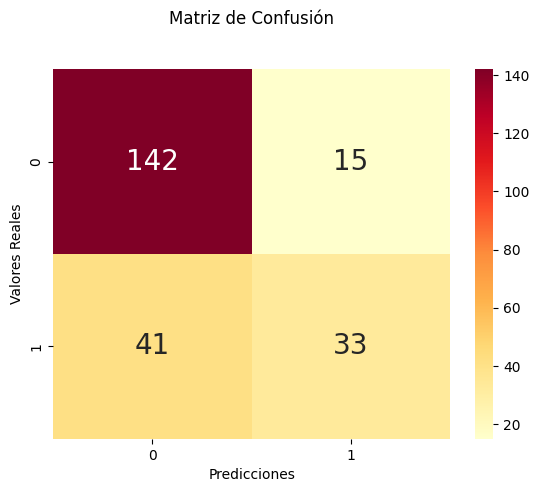

In [53]:
MC= metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(MC),                    # data.frame
                annot=True,                          # colocar números de las cajitas
                annot_kws = {'size':20},             # tamaño de la letra
                cmap="YlOrRd",                       # color de la letra 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu'
                fmt='g')                             # para que salgan los número no : notación científica
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')

Vamos a calcular las métricas mencionadas anteriormente:

In [54]:
#accuracy score
# nombre de las métricas
metrics=["accuracy", "recall" , "precision", "f1"]
# valores
values = [accuracy_score(y_test,y_pred),
          recall_score(y_test,y_pred),
          precision_score(y_test,y_pred),
          f1_score(y_test,y_pred)]
pd.DataFrame({"metrics": metrics , "values" : values})

,metrics,values
0,accuracy,0.757576
1,recall,0.445946
2,precision,0.687500
3,f1,0.540984


| Métrica   | ¿Por qué es importante en detección de diabetes? |
|---------- |---------|
| Recall       | Es clave porque queremos detectar todos los pacientes con diabetes y minimizar los falsos negativos (FN). <br> Un FN significaría que un paciente enfermo no recibe tratamiento a tiempo.  |
| F1-Score    | Si hay un desbalance en los datos (pocos casos positivos), ayuda a equilibrar precisión y recall.<br> Evita que un modelo con alta precisión pero bajo recall o viceversa sea engañoso.   |
| Precision    | Es importante, pero no tan prioritaria como el recall. <br>Un alto recall puede generar algunos falsos positivos (FP), pero es preferible hacer más pruebas a pacientes <br> falsamente etiquetados con diabetes que dejar enfermos sin diagnóstico.   |
| Especificidad    | Puede ser útil, pero no es la métrica principal. <br>Si la especificidad es demasiado alta, podría significar que el modelo no detecta suficientes casos de diabetes.   |

Otra forma de revisar las métricas es con el *classification_report*

In [ ]:
print(classification_report(y_test,y_pred))

**Conclusiones**:

- El modelo está clasificando bien al $76\%$ de los registros. No es un valor muy alto.

- El *recall* es $0.45$, es decir, de las personas que tienen diabetes, el algoritmo detecta correctamente un $45\%$. El algoritmo no es tan bueno detectando personas con diabetes en los que sí tienen la enfermedad.

- Se recomienda, tratar de optimizar los hiperparámetros o utilizar otro modelo.

# <FONT SIZE=5 COLOR="Purple"> 6. Predicción en KNN </FONT>



Aunque el rendimiento del modelo no es el mejor, vamos a mostrar como se haría una predicción de un valor nuevo.

Particularmente, en estos algoritmos en los que se debe escalar, se deben escalar los valores a predecir. Este escalamiento se hace con base a $X_{train}$.

Supongamos que queremos predecir si una paciente es propensa a tener diabetes o no, con los siguientes valores:

- ***Pregnancies*** : 6
- ***Glucose*** : 148
- ***BloodPressure*** : 72
- ***SkinThikness*** : 35
- ***Insulin*** : 80
- ***BMI*** : 33.6
- ***DiabetesPedigreeFunction*** : 0.627
- ***Age*** : 50

In [ ]:
# representamos en forma de lista
[6,	148,	72,	35,	80,	33.6,	0.627, 50]

In [ ]:
# usamos la función escalar.transform
X_new = np.array([[6,	148,	72,	35,	80,	33.6,	0.627,	50]])
X_test1 = escalar.transform(X_new)
X_test1

In [ ]:
KNN.predict(X_test1)

Ahora bien, podemos ver los vecinos más cercanos a este valor

In [ ]:
from sklearn.neighbors import NearestNeighbors
# ver los vecinos más cercanos
distancias, indices = KNN.kneighbors(X_test1,
                                     n_neighbors=10,
                                     return_distance=True)

In [ ]:
vecinos_cercanos = X_train.iloc[indices[0]]
vecinos_cercanos["distancias"] = distancias[0]
vecinos_cercanos["resultados_vecinos"] = y_train.iloc[indices[0]]
vecinos_cercanos

# <FONT SIZE=5 COLOR="purple"> 7. Validación Cruzada </FONT>

La **validación cruzada**, o *cross validation*, es una técnica utilizada para evaluar los resultados obtenidos de un modelo de *machine learning* y garantizar que son independientes de los conjuntos de entrenamiento ($X_{train}$) y prueba ($X_{test}$).

- Cuando usamos la función de *sklearn*:

$$train\_test\_split(X, y, random\_state = 123 )$$

se extraen dos muestras aleatorias como conjuntos de entrenamiento y prueba. Luego se hace el proceso de entrenamiento y validación del modelo, teniendo como referencias las muestras seleccionadas. Sin embargo, una pregunta natural es:

**¿Qué sucede si tomo otras muestras como conjunto de entrenamiento y de prueba, obtendré los mismos resultados?**

Para responder lo anterior, debemos seleccionar varias muestras que correspondan a conjunto de entrenamiento y prueba diferentes y hacer el análisis del modelo. Precisamente, esto es lo que hace el proceso de validación cruzada.

Se divide el conjunto de datos en $n$ partes, de las cuales se toma una como conjunto de *prueba* y las otras $n-1$ como conjunto de entrenamiento. Y vamos rotando el conjunto de prueba, tal y como se muestra en la siguiente figura.

<br>

<center><img src="https://github.com/Fabian830348/cursos/blob/master/val_cruzada/validation1.png?raw=true?" alt="centered image" width="600" height="350"></center>

<br>

In [ ]:
# Validación cruzada k fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#kfold_validacion = KFold(10)                              # divide los datos en 10 pliegues.
resultados = cross_val_score(KNN,                          # modelo aplicado
                             X,                            # conjunto de predictores
                             y,                            # variable de respuesta
                             cv = 5,                       # número de divisiones en cross-validation.
                             scoring = "accuracy")         # se puede escoger la métrica.
print(resultados)                                          # para ver la variable resultados.
resultados.mean()

Obtenemos en promedio 0.74 de *Accuracy*

# <FONT SIZE=5 COLOR="purple"> 8. Parámetro vs Hiperparámetro </FONT>

Iniciaremos definiendo los siguientes conceptos:

**Parámetros**:

- Son variables propias del modelo y que se obtienen de forma automática usando el conjunto de entrenamiento. Es decir, se estiman a partir de los datos.  

- Por ejemplo, en regresión lineal buscamos una ecuación de la forma $y= \beta_1 x +\beta_0$ y precisamente este tipo de modelo nos ayuda a encontrar estos valores de $\beta_1$ y $\beta_0$.

***Hiperparámetros:***

- Son parámetros de aprendizaje automático que se eligen antes de iniciar el proceso de aprendizaje automático.

- Son variables externas al modelo que no se obtienen automáticamente a partir de los datos.

- Son ajustables y pueden afectar directamente a la forma en la que se entrena un modelo de aprendizaje automático.

Algunos de estos hiperparámetros son:

- *Número de vecinos en knn*

- *Número de épocas en redes neuronales*

- *Número de ramas en un árbol de decisión*

- *Número de clústeres en un algoritmo de agrupamiento*

- *Tipo de kernel en SVM*

Los hiperparámetros son flexibles, ya que se refieren a cualquier elemento en el machine learning y el deep learning que decida sus valores o elija su configuración antes de que comience el entrenamiento y cuyos valores permanecen iguales cuando se finaliza el entrenamiento.

Los parámetros, por su lado, son características inherentes al modelo. Esto quiere decir que se aprenden o se estiman a partir de los datos brindados durante el entrenamiento, ya que el algoritmo que se use intentará aprender a partir de las características de entrada y la variable objetivo.

**Hiperparámetros de KNN**

Particularmente en el algoritmo de ***knn***, k-vecinos más cercanos tenemos los siguientes hiperpámetros.

- El ***número de vecinos*** $k$.

- Las ***métricas***. Las más clásicas se pueden seleccionar entre:

   - Euclideana
   - Manhattan
   - Minkowski

- Los ***pesos*** en las métricas.

   - Uniformes
   - Respecto a la distancia.  

Podemos ver la documentación para ampliar la información

[ALGORITMO KNN-sklearn 🌎](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)


# <FONT SIZE=5 COLOR="purple"> 9. Búsqueda en Grilla </FONT>

- La ***búsqueda en grilla*** (grid search) es un método que busca las mejores combinaciones de hiperparámetros que hacen que un modelo tenga el error más bajo, es decir, estimaciones más precisas.

- En cada combinación de hiperparámetros, la búsqueda en grilla aplica el proceso de *cross-validation* con el fin de dar una mejor evaluación del modelo en cada punto.

- Cuando hablamos de búsqueda en grilla tenemos algunas alternativas: Grid Search y Random Grid Search. La primera se denomina propiamente *Grid Search* y en este método, se toman todas las combinaciones posibles de los hiperparámetros que se van a revisar. Como se ilustra en la siguiente gráfica.

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/val_cruzada/grid1.png?raw=true?" alt="centered image" width="600" height="350"></center>
<br>

- Por otro lado, tenemos el ***Random Search***, que es una versión del primero donde no se toman todas las combinaciones de hiperparámetros sino que se selecciona una determinada cantidad aleatoria de combinaciones. Este método es útil cuando se tienen muchos hiperparámetros y el procesamiento puede demorarse.

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/val_cruzada/grid2.png?raw=true?" alt="centered image" width="600" height="400"></center>

Para hacer la búsqueda en grilla, vamos a considerar los siguientes parámetros

1. El número de vecinos $k$ : [1,20]
2. Las métricas : *euclideana* y *manhattan*
3. Los pesos: "uniformes" o basados en "distancia"

De acuerdo con lo anterior tenemos

$$(20 \, vecinos) \times ( 2 \, metricas) \times ( 2 \, pesos) = 80$$

combinaciones de parámetros.

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# definimos los parámetros que vamos a combinar. Diccionario
grid_params = {"n_neighbors" : list(range(1, 21)),         # se recorre la lista en k
               "weights" : ["uniform","distance"],         # se establecen los pesos
               "metric" : ["euclidean","manhattan"]}       # se establecen las métricas

# hacemos la búsqueda en grilla con 5-folds
Grid_Search = GridSearchCV(KNN,                                     # el modelo aplicado
                           grid_params,                             # los parámetros que van a variar
                           cv = 10,                                 # el número de folds
                           verbose = 1)                             # para que imprima resultados. Posibilidades: 1,2 o 3
# Entrenar el modelo obtenido arriba
g_res = Grid_Search.fit(X_train_s,y_train)

Ahora, buscamos el mejor *score*

In [ ]:
print("Mejor score: ",g_res.best_score_)

Finalmente, los hiperparámetros que lograron ese *score*

In [ ]:
print("Mejores hiperparámetros", g_res.best_params_)

Si queremos la búsqueda en grilla Randon Grid

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# definimos los parámetros que vamos a combinar. Diccionario
grid_params = {"n_neighbors" : list(range(1, 21)),         # se recorre la lista en k
               "weights" : ["uniform","distance"],         # se establecen los pesos
               "metric" : ["euclidean","manhattan"]}       # se establecen las métricas

# hacemos la búsqueda en grilla con 5-folds
Ran_Grid = RandomizedSearchCV(KNN,                         # el modelo aplicado
                              grid_params,                 # los parámetros que van a variar
                              cv = 10,                      # el número de folds
                              n_iter = 10,                 # definimos el número de iteraciones.
                              verbose = 3)                 # para que imprima resultados. Posibilidades: 1,2 o 3
# Entrenar el modelo obtenido arriba
g_res2 = Ran_Grid.fit(X_train,y_train)

In [ ]:
print("Mejor score: ",g_res2.best_score_)

In [ ]:
print("Mejores hiperparámetros", g_res2.best_params_)

**Bonus**

A continuación, una idea de código para convertir el notebook a PDF.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!apt-get install texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc
!apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

In [ ]:
!jupyter nbconvert --to PDF /content/drive/MyDrive/1.1_ML_2025_1/Notebook_2_Clasificacion_KNN.ipynb